### Decision Tree Algorithm

### **Problem Statement:**

**About Company**

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

**Problem statement**

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. Build a decision tree machine learning model that can be used to predict if a customer qualify for a loan or not.


In [1]:
# importing the library
import pandas as pd
banking_df = pd.read_csv("E:\Sankhyana Training\Datasets\Decision_Tree_loan_data_set.csv")
banking_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
#data information
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
# checking for the missing values
banking_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# filling the mssing entries
banking_df1 = banking_df.fillna(method="ffill").fillna(method='bfill')
banking_df1.isnull().sum()

C:\Users\Alvine\AppData\Local\Temp\ipykernel_1220\3101954566.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  banking_df1 = banking_df.fillna(method="ffill").fillna(method='bfill')


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
banking_df1.shape

(614, 13)

In [6]:
banking_df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# deleting the Loan_ID column
banking_df2 = banking_df1.drop(["Loan_ID"], axis =1)
banking_df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# checking the actual number of unique values
banking_df2.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
# checking the actual number of unique values
banking_df2.Gender.value_counts()

Gender
Male      500
Female    114
Name: count, dtype: int64

In [11]:
# checking the actual number of unique values
banking_df2.Married.value_counts()

Married
Yes    400
No     214
Name: count, dtype: int64

In [12]:
# checking the actual number of unique values
banking_df2.Dependents.value_counts()

Dependents
0     354
2     105
1     104
3+     51
Name: count, dtype: int64

In [14]:
banking_df2.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [17]:
import warnings
warnings.simplefilter('ignore')

banking_df2["Dependents"][banking_df2["Dependents"]=='3+'] = 3

In [24]:
banking_df2.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [19]:
# checking the actual number of unique values
banking_df2.Dependents.value_counts()

Dependents
0    354
2    105
1    104
3     51
Name: count, dtype: int64

In [20]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

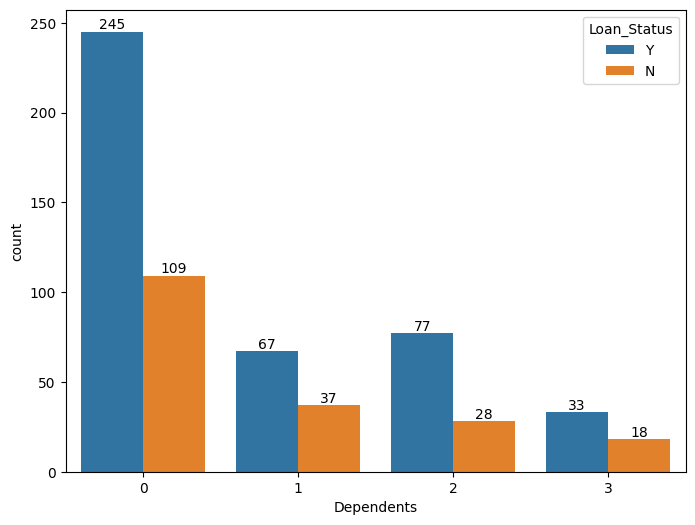

In [29]:
plt.figure (figsize=(8,6))
ax = sns.countplot(x = "Dependents", hue ="Loan_Status", data = banking_df2)
for p in ax.containers:
    ax.bar_label(p)

In [30]:
# checking the actual number of unique values
banking_df2.Married.value_counts()

Married
Yes    400
No     214
Name: count, dtype: int64

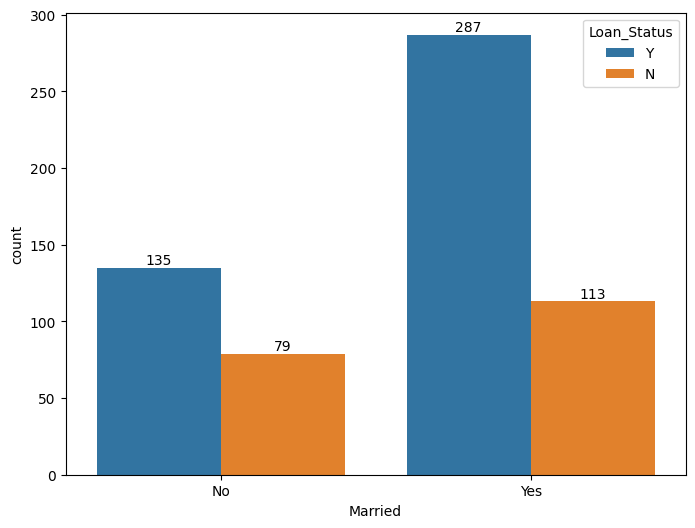

In [31]:
plt.figure (figsize=(8,6))
ax = sns.countplot(x = "Married", hue ="Loan_Status", data = banking_df2)
for p in ax.containers:
    ax.bar_label(p)

In [32]:
# checking the actual number of unique values
banking_df2.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

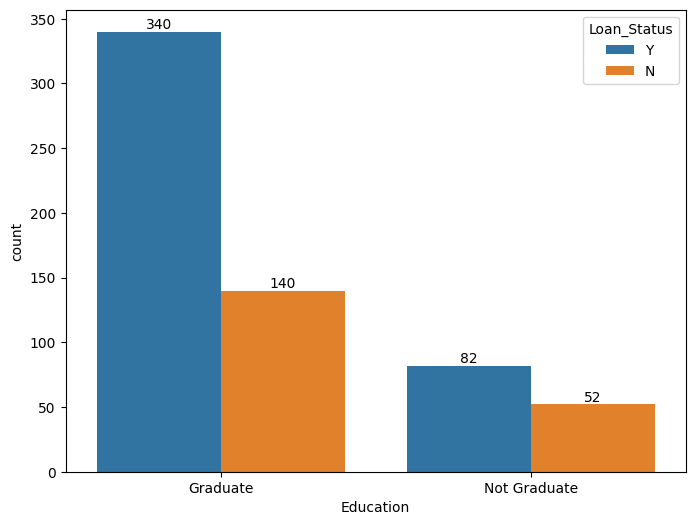

In [33]:
plt.figure (figsize=(8,6))
ax = sns.countplot(x = "Education", hue ="Loan_Status", data = banking_df2)
for p in ax.containers:
    ax.bar_label(p)

In [34]:
banking_df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
# Label encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
banking_df2["Gender"] = le.fit_transform(banking_df2["Gender"])
banking_df2["Married"] = le.fit_transform(banking_df2["Married"])
banking_df2["Education"] = le.fit_transform(banking_df2["Education"])
banking_df2["Self_Employed"] = le.fit_transform(banking_df2["Self_Employed"])
banking_df2["Property_Area"] = le.fit_transform(banking_df2["Property_Area"])
banking_df2["Loan_Status"] = le.fit_transform(banking_df2["Loan_Status"])

In [39]:
banking_df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: >

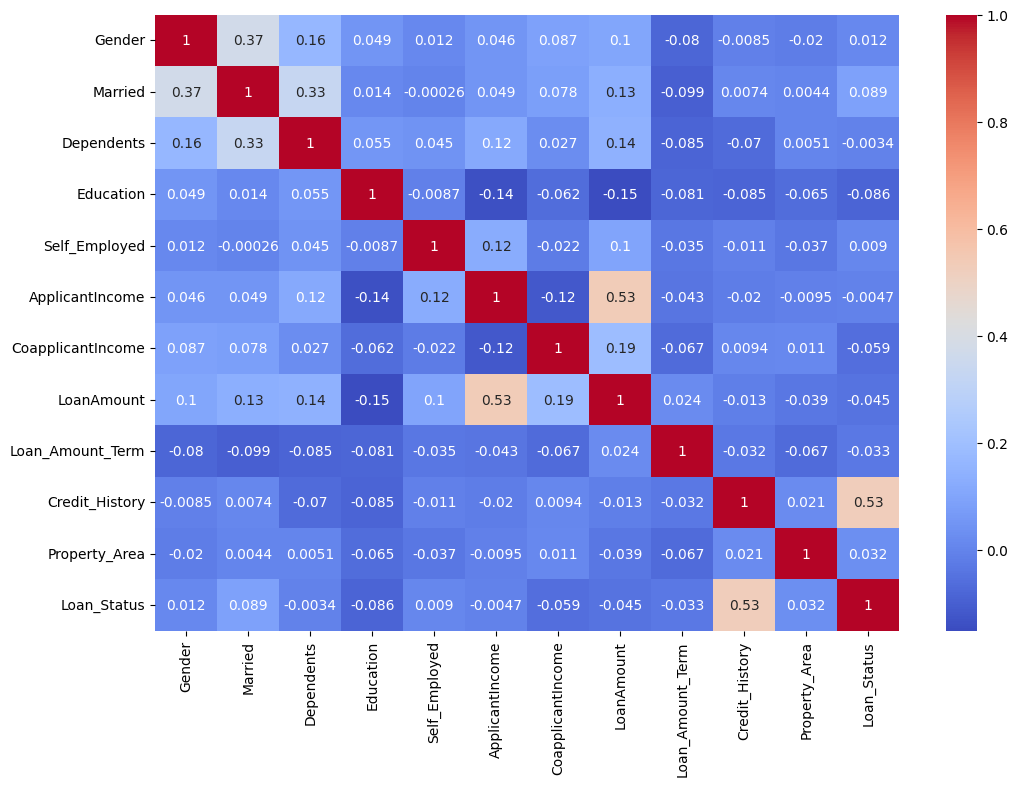

In [44]:
# ploting a heatmap to check on the correlation of diffreent features
plt.figure(figsize=(12,8))
sns.heatmap( banking_df2.corr(), annot = True, cmap = "coolwarm")

In [46]:
### Features Selection
input_features = banking_df2.iloc[:, :11]
input_features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [48]:
traget_feature = banking_df2.iloc [:, 11]
traget_feature

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [49]:
# spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input_features,traget_feature, train_size= 0.8 )

In [50]:
X_train.shape

(491, 11)

In [51]:
X_test.shape

(123, 11)

In [55]:
# Training the model using Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(max_depth = 3)

In [56]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [58]:
# Checking the model accuracy
pred = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(pred, Y_test)

0.8373983739837398

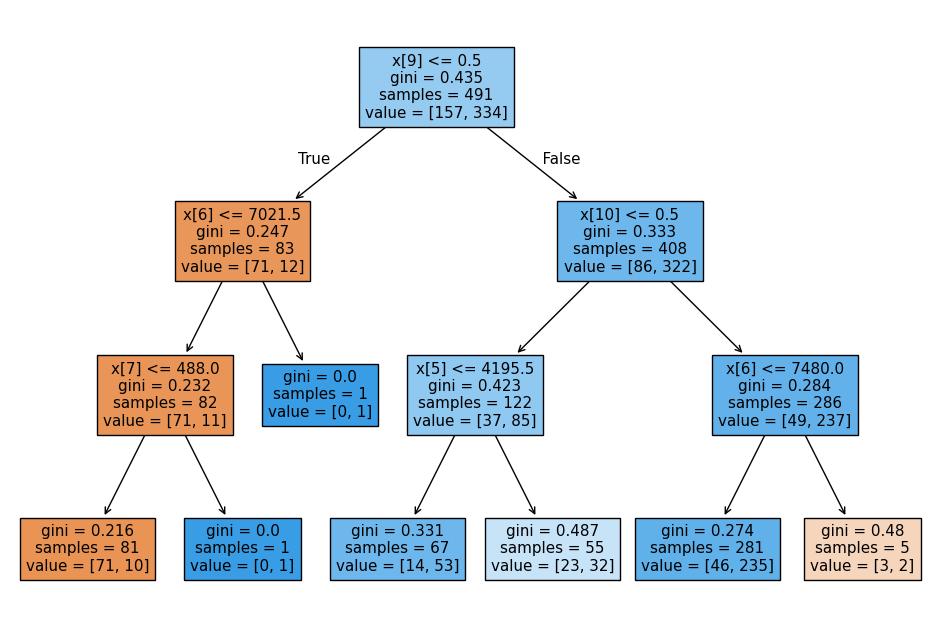

In [71]:
## Visualizing the model
from sklearn.tree import plot_tree
plt.figure(figsize= (12,8))
tree_val = plot_tree(dt_model, filled= True)

### Random Forest Algorithm


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf_model = RandomForestClassifier (max_depth = 4)

In [74]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4)

In [75]:
# checking the model accuracy
pred1 = rf_model.predict(X_test)

accuracy_score(pred, Y_test)

0.7723577235772358